In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
from datetime import datetime
%matplotlib inline

In [13]:
df = pd.read_csv('data/HIV_TOI.csv')
df.head()

,Date,Title,article
0,"May 22, 2001, 12:40 IST",Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,"May 28, 2001, 15:19 IST","NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,"Aug 13, 2001, 23:36 IST",Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,"Aug 7, 2001, 23:19 IST",Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,"Seema Kamdar,Aug 15, 2001, 01:23 IST",Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [14]:
df.dropna(how='any', axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [15]:
df['Date'] = df['Date'].apply(lambda x: re.findall(r'[a-zA-Z]{3}\s[0-9]{1,2},\s[0-9]{4}', x))

In [16]:
df.head()

,Date,Title,article
0,"[May 22, 2001]",Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,"[May 28, 2001]","NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,"[Aug 13, 2001]",Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,"[Aug 7, 2001]",Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,"[Aug 15, 2001]",Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [17]:
type(df['Date'][0])

list

In [18]:
df['Date'] = df.Date.apply(', '.join)
df.head()

,Date,Title,article
0,"May 22, 2001",Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,"May 28, 2001","NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,"Aug 13, 2001",Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,"Aug 7, 2001",Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,"Aug 15, 2001",Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [19]:
type(df['Date'][0])

str

In [20]:
df['Date'] = df['Date'].str.replace(',','').astype('str')
df.head()

,Date,Title,article
0,May 22 2001,Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,May 28 2001,"NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,Aug 13 2001,Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,Aug 7 2001,Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,Aug 15 2001,Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [21]:
#df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b %d %Y').strftime('%d/%m/%Y'))
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b %d %Y'))
df.head()

,Date,Title,article
0,2001-05-22,Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,2001-05-28,"NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,2001-08-13,Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,2001-08-07,Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,2001-08-15,Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df = df.reset_index(drop=True).set_index('Date')

In [24]:
df.head()

,Title,article
Date,,
2001-05-22,Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
2001-05-28,"NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2001-08-13,Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
2001-08-07,Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
2001-08-15,Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [15]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [25]:
#df.groupby(df['Date'].dt.strftime('%B'))['Title'].count().sort_values()
df.index = pd.to_datetime(df.index)

In [27]:
df.head()

,Title,article
Date,,
2001-05-22,Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
2001-05-28,"NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2001-08-13,Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
2001-08-07,Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
2001-08-15,Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


## Yearwise Plot

In [32]:
df1 = df.resample('AS').count()
df1.head()

,Title,article
Date,,
2001-01-01,27,27
2002-01-01,82,82
2003-01-01,95,95
2004-01-01,59,59
2005-01-01,58,58


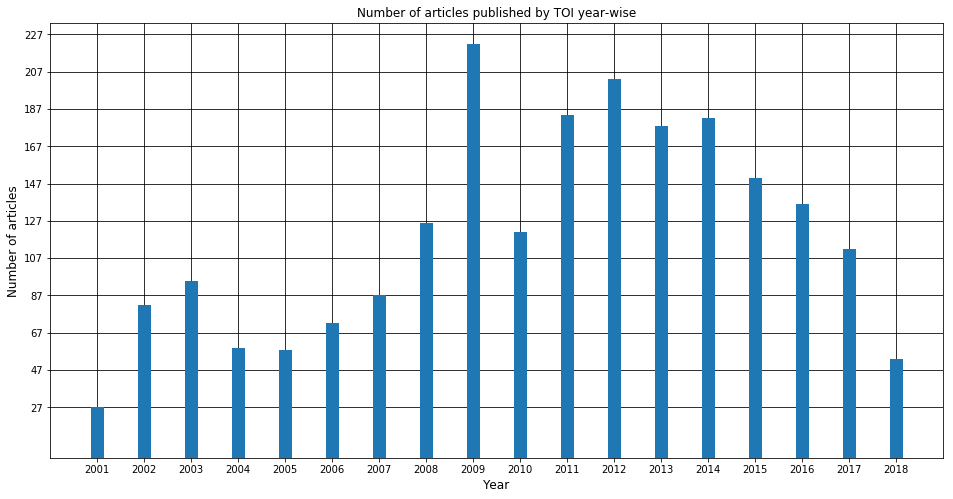

In [43]:
# Yearly Plot
fig, ax = plt.subplots(figsize=(16, 8))
plt.yticks(np.arange(df1['Title'].min(), df1['Title'].max()+20, 20))
plt.xticks(df1.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.grid(True)
ax.grid(color='black', zorder=0)
ax.bar(df1.index, df1['Title'], width = 100, zorder=3)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.title("Number of articles published by TOI year-wise")
plt.show()

## Monthly Plot

In [37]:
# quarter start frequency
df_m = df.resample('M').count()

In [38]:
df_m.head()

,Title,article
Date,,
2001-05-31,2,2
2001-06-30,0,0
2001-07-31,0,0
2001-08-31,6,6
2001-09-30,1,1


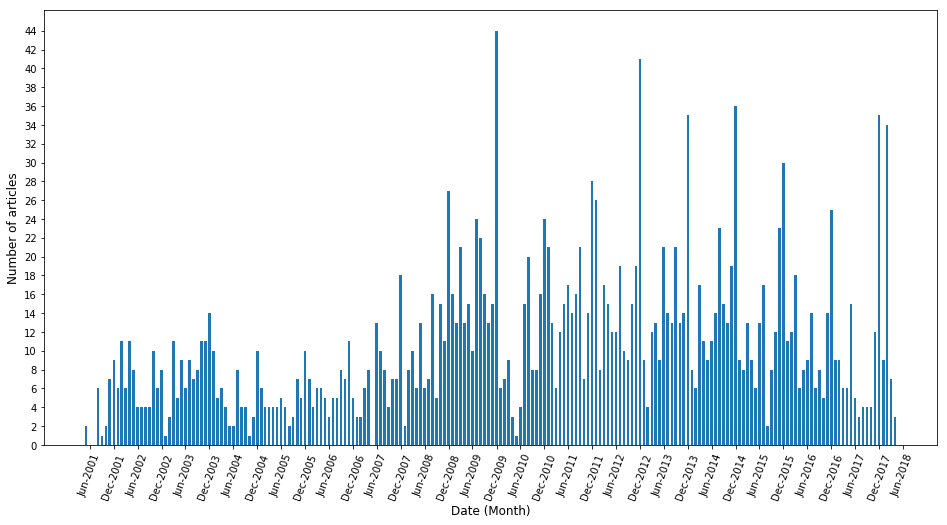

In [41]:
fig, ax = plt.subplots(figsize=(16,8))
plt.yticks(np.arange(df_m['Title'].min(), df_m['Title'].max()+1, 2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.bar(df_m.index, df_m['Title'], width = 20, zorder=10)
plt.xticks(df_semi.index, rotation=70)
plt.xlabel('Date (Month)', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.show()

In [40]:
df_semi = df.resample('2Q').count()

# Indian Express

In [37]:
df = pd.read_csv('data/HIV_IE.csv')
df.head()

,Date,Title,article
0,"Posted:, Fri May 09 1997 IST",Drug cocktail to wipe out HIV will take 3 years,", LONDON, May 8: Drugs meant to wipe out the ..."
1,"Posted:, Sun Jun 22 1997 IST",Book on healthy living for HIV positives,", CHENNAI, June 20: The Tamil Nadu State AIDS..."
2,"Posted:, Mon Aug 04 1997 IST",Testing HIV-positive is not the end of the road,", August 3: A skit on HIV-AIDS is in progress..."
3,"Posted:, Sun Nov 30 1997 IST",HIV positive student deported,", AURANGABAD, November 29: A girl student fro..."
4,"Posted:, Sat Nov 22 1997 IST","World Vignettes -- ""Weapon"" to counter HIV virus",", WASHINGTON: It may take a virus to kill a v..."


In [38]:
df.dropna(how='any', axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [39]:
df['Date'] = df['Date'].apply(lambda x: re.findall(r'[a-zA-Z]{3}\s[0-9]{1,2}(?:,)*(?:\s)*[0-9]{4}', x))

In [40]:
df.head()

,Date,Title,article
0,[May 09 1997],Drug cocktail to wipe out HIV will take 3 years,", LONDON, May 8: Drugs meant to wipe out the ..."
1,[Jun 22 1997],Book on healthy living for HIV positives,", CHENNAI, June 20: The Tamil Nadu State AIDS..."
2,[Aug 04 1997],Testing HIV-positive is not the end of the road,", August 3: A skit on HIV-AIDS is in progress..."
3,[Nov 30 1997],HIV positive student deported,", AURANGABAD, November 29: A girl student fro..."
4,[Nov 22 1997],"World Vignettes -- ""Weapon"" to counter HIV virus",", WASHINGTON: It may take a virus to kill a v..."


In [41]:
df['Date'] = df.Date.apply(''.join)
df.head()

,Date,Title,article
0,May 09 1997,Drug cocktail to wipe out HIV will take 3 years,", LONDON, May 8: Drugs meant to wipe out the ..."
1,Jun 22 1997,Book on healthy living for HIV positives,", CHENNAI, June 20: The Tamil Nadu State AIDS..."
2,Aug 04 1997,Testing HIV-positive is not the end of the road,", August 3: A skit on HIV-AIDS is in progress..."
3,Nov 30 1997,HIV positive student deported,", AURANGABAD, November 29: A girl student fro..."
4,Nov 22 1997,"World Vignettes -- ""Weapon"" to counter HIV virus",", WASHINGTON: It may take a virus to kill a v..."


In [42]:
df['Date'] = df['Date'].str.replace(',', '').astype('str')

In [44]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b %d %Y'))

In [45]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.reset_index(drop=True).set_index('Date')

In [46]:
df.head()

,Title,article
Date,,
1997-05-09,Drug cocktail to wipe out HIV will take 3 years,", LONDON, May 8: Drugs meant to wipe out the ..."
1997-06-22,Book on healthy living for HIV positives,", CHENNAI, June 20: The Tamil Nadu State AIDS..."
1997-08-04,Testing HIV-positive is not the end of the road,", August 3: A skit on HIV-AIDS is in progress..."
1997-11-30,HIV positive student deported,", AURANGABAD, November 29: A girl student fro..."
1997-11-22,"World Vignettes -- ""Weapon"" to counter HIV virus",", WASHINGTON: It may take a virus to kill a v..."


# The Hindu

In [45]:
df = pd.read_csv('data/HIV_TH.csv')
del df['url']
df.head()

,Article,Date,Title
0,"\r\n,\r\n,\r\n,\r\nTHE HIV epidemic is alive ...","Tuesday, February 01, 2000",\r\nPutting HIV in the spotlight\r\n
1,"\r\n,\r\n,\r\n,\r\nA YEAR ago, researchers at ...","Thursday, February 17, 2000",\r\nNew insight into HIV transmission \r\n
2,"\r\n,\r\n,\r\n,\r\n,\r\nAN IMPORTANT mileston...","Thursday, February 17, 2000",\r\nNew 'drug' taking method to prevent HIV tr...
3,"\r\n,\r\n,\r\n,\r\nA STUDY conducted in cell c...","Thursday, March 02, 2000",\r\nGene therapy halts HIV replication \r\n
4,"\r\n,\r\n,\r\n,\r\nKURUKSHETRA, MARCH 5. A wro...","Monday, March 06, 2000",\r\nWrong HIV result costs him a job\r\n


In [46]:
df.shape

(2355, 3)

In [47]:
df.dropna(how='any', axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [48]:
df.shape

(2354, 3)

In [49]:
df['Date'] = df['Date'].apply(lambda x: re.findall(r'[a-zA-Z]{3,9}\s[0-9]{1,2}(?:,)*(?:\s)*[0-9]{4}', x))

In [50]:
df.head()

,Article,Date,Title
0,"\r\n,\r\n,\r\n,\r\nTHE HIV epidemic is alive ...","[February 01, 2000]",\r\nPutting HIV in the spotlight\r\n
1,"\r\n,\r\n,\r\n,\r\nA YEAR ago, researchers at ...","[February 17, 2000]",\r\nNew insight into HIV transmission \r\n
2,"\r\n,\r\n,\r\n,\r\n,\r\nAN IMPORTANT mileston...","[February 17, 2000]",\r\nNew 'drug' taking method to prevent HIV tr...
3,"\r\n,\r\n,\r\n,\r\nA STUDY conducted in cell c...","[March 02, 2000]",\r\nGene therapy halts HIV replication \r\n
4,"\r\n,\r\n,\r\n,\r\nKURUKSHETRA, MARCH 5. A wro...","[March 06, 2000]",\r\nWrong HIV result costs him a job\r\n


In [51]:
df['Date'] = df.Date.apply(''.join)
df.head()

,Article,Date,Title
0,"\r\n,\r\n,\r\n,\r\nTHE HIV epidemic is alive ...","February 01, 2000",\r\nPutting HIV in the spotlight\r\n
1,"\r\n,\r\n,\r\n,\r\nA YEAR ago, researchers at ...","February 17, 2000",\r\nNew insight into HIV transmission \r\n
2,"\r\n,\r\n,\r\n,\r\n,\r\nAN IMPORTANT mileston...","February 17, 2000",\r\nNew 'drug' taking method to prevent HIV tr...
3,"\r\n,\r\n,\r\n,\r\nA STUDY conducted in cell c...","March 02, 2000",\r\nGene therapy halts HIV replication \r\n
4,"\r\n,\r\n,\r\n,\r\nKURUKSHETRA, MARCH 5. A wro...","March 06, 2000",\r\nWrong HIV result costs him a job\r\n


In [52]:
df['Date'] = df['Date'].str.replace(',', '').astype('str')

In [53]:
df.head()

,Article,Date,Title
0,"\r\n,\r\n,\r\n,\r\nTHE HIV epidemic is alive ...",February 01 2000,\r\nPutting HIV in the spotlight\r\n
1,"\r\n,\r\n,\r\n,\r\nA YEAR ago, researchers at ...",February 17 2000,\r\nNew insight into HIV transmission \r\n
2,"\r\n,\r\n,\r\n,\r\n,\r\nAN IMPORTANT mileston...",February 17 2000,\r\nNew 'drug' taking method to prevent HIV tr...
3,"\r\n,\r\n,\r\n,\r\nA STUDY conducted in cell c...",March 02 2000,\r\nGene therapy halts HIV replication \r\n
4,"\r\n,\r\n,\r\n,\r\nKURUKSHETRA, MARCH 5. A wro...",March 06 2000,\r\nWrong HIV result costs him a job\r\n


In [54]:
df[df['Date'] == 'ary 01 2000']

,Article,Date,Title


In [39]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%B %d %Y') if len(x) > 11 else datetime.strptime(x, '%b %d %Y'))

In [25]:
df.head()

,Article,Date,Title
0,"\r\n,\r\n,\r\n,\r\nTHE HIV epidemic is alive ...",2000-02-01,\r\nPutting HIV in the spotlight\r\n
1,"\r\n,\r\n,\r\n,\r\nA YEAR ago, researchers at ...",2000-02-17,\r\nNew insight into HIV transmission \r\n
2,"\r\n,\r\n,\r\n,\r\n,\r\nAN IMPORTANT mileston...",2000-02-17,\r\nNew 'drug' taking method to prevent HIV tr...
3,"\r\n,\r\n,\r\n,\r\nA STUDY conducted in cell c...",2000-03-02,\r\nGene therapy halts HIV replication \r\n
4,"\r\n,\r\n,\r\n,\r\nKURUKSHETRA, MARCH 5. A wro...",2000-03-06,\r\nWrong HIV result costs him a job\r\n


In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df.head()

,Article,Date,Title
0,"\r\n,\r\n,\r\n,\r\nTHE HIV epidemic is alive ...",2000-02-01,\r\nPutting HIV in the spotlight\r\n
1,"\r\n,\r\n,\r\n,\r\nA YEAR ago, researchers at ...",2000-02-17,\r\nNew insight into HIV transmission \r\n
2,"\r\n,\r\n,\r\n,\r\n,\r\nAN IMPORTANT mileston...",2000-02-17,\r\nNew 'drug' taking method to prevent HIV tr...
3,"\r\n,\r\n,\r\n,\r\nA STUDY conducted in cell c...",2000-03-02,\r\nGene therapy halts HIV replication \r\n
4,"\r\n,\r\n,\r\n,\r\nKURUKSHETRA, MARCH 5. A wro...",2000-03-06,\r\nWrong HIV result costs him a job\r\n


In [28]:
df = df.reset_index(drop=True).set_index('Date')

In [29]:
df.head()

,Article,Title
Date,,
2000-02-01,"\r\n,\r\n,\r\n,\r\nTHE HIV epidemic is alive ...",\r\nPutting HIV in the spotlight\r\n
2000-02-17,"\r\n,\r\n,\r\n,\r\nA YEAR ago, researchers at ...",\r\nNew insight into HIV transmission \r\n
2000-02-17,"\r\n,\r\n,\r\n,\r\n,\r\nAN IMPORTANT mileston...",\r\nNew 'drug' taking method to prevent HIV tr...
2000-03-02,"\r\n,\r\n,\r\n,\r\nA STUDY conducted in cell c...",\r\nGene therapy halts HIV replication \r\n
2000-03-06,"\r\n,\r\n,\r\n,\r\nKURUKSHETRA, MARCH 5. A wro...",\r\nWrong HIV result costs him a job\r\n
